tensor(1.9946)
tensor(-0.9998)


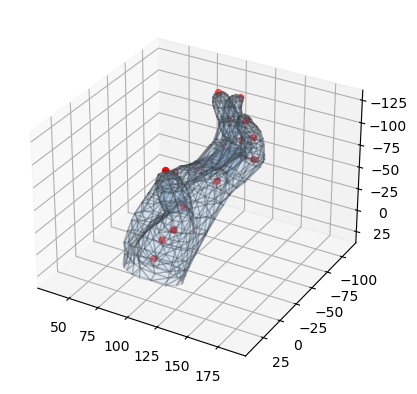

In [13]:
import torch
from manopth.manolayer import ManoLayer
from manopth import demo
batch_size = 10
# Select number of principal components for pose space
ncomps = 45

# Initialize MANO layer
mano_layer = ManoLayer(
    mano_root='/root/workplace/backup/blurhand/model', use_pca=True, ncomps=ncomps, flat_hand_mean=False)

# Generate random shape parameters
random_shape = torch.zeros(batch_size, 10)
# Generate random pose parameters, including 3 values for global axis-angle rotation
random_pose = (-1 - 1.0) * torch.rand(batch_size, ncomps + 3) + 2.0
print(torch.max(random_pose))
print(torch.min(random_pose))

# Forward pass through MANO layer
hand_verts, hand_joints = mano_layer(random_pose, random_shape)
demo.display_hand({
    'verts': hand_verts,
    'joints': hand_joints
},
                  mano_faces=mano_layer.th_faces)


In [14]:
torch.mean(random_pose)

tensor(0.4588)

tensor(0.9987)
tensor(0.0005)


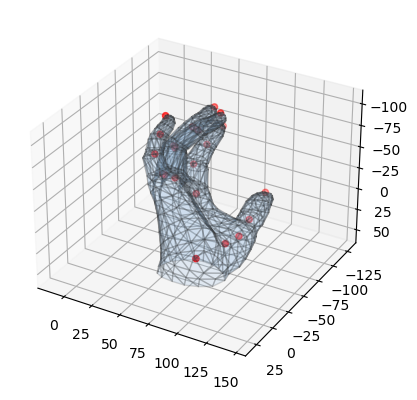

In [122]:
import torch
from manopth.manolayer import ManoLayer
from manopth import demo
batch_size = 10
# Select number of principal components for pose space
ncomps = 45

# Initialize MANO layer
mano_layer = ManoLayer(
    mano_root='/root/workplace/backup/blurhand/model', use_pca=True, ncomps=ncomps, flat_hand_mean=False)

# Generate random shape parameters
random_shape = torch.zeros(batch_size, 10)
# Generate random pose parameters, including 3 values for global axis-angle rotation
random_pose = random_pose - 10
print(torch.max(random_pose))
print(torch.min(random_pose))

# Forward pass through MANO layer
hand_verts, hand_joints = mano_layer(random_pose, random_shape)
demo.display_hand({
    'verts': hand_verts,
    'joints': hand_joints
},
                  mano_faces=mano_layer.th_faces)


In [15]:
min = torch.min(random_pose, dim=1)[0]
max = torch.max(random_pose, dim=1)[0]

In [27]:
max

tensor([1.9663, 1.9445, 1.9888, 1.9946, 1.6939, 1.9538, 1.8767, 1.9275, 1.8116,
        1.9192])

In [25]:
a = random_pose[0]

In [30]:
a

tensor([ 1.9663,  1.6472,  1.9490,  1.6935,  0.9214, -0.0945, -0.3703, -0.9225,
         1.7786,  1.5087,  1.1186,  1.1667,  0.8247,  0.2648,  1.6865,  0.4975,
         0.5628, -0.3771,  0.8389, -0.4500,  1.8935,  0.4065,  1.3255,  0.5244,
        -0.6927,  0.5778,  1.8969,  1.6733, -0.3978,  1.8454,  1.5192, -0.8406,
        -0.9364, -0.5600,  0.9302,  0.3479,  1.6194, -0.6757,  0.5132,  0.0100,
        -0.4139, -0.9998,  1.6144, -0.3314, -0.1452, -0.6301,  1.4977,  1.9010])

In [28]:
norm_a = a - torch.min(a) / (torch.max(a) - torch.min(a))

In [29]:
norm_a

tensor([ 2.3034,  1.9843,  2.2861,  2.0305,  1.2584,  0.2426, -0.0333, -0.5855,
         2.1157,  1.8458,  1.4557,  1.5037,  1.1617,  0.6019,  2.0235,  0.8345,
         0.8998, -0.0400,  1.1759, -0.1130,  2.2306,  0.7436,  1.6625,  0.8615,
        -0.3556,  0.9148,  2.2339,  2.0104, -0.0607,  2.1825,  1.8563, -0.5035,
        -0.5994, -0.2229,  1.2673,  0.6850,  1.9565, -0.3386,  0.8502,  0.3470,
        -0.0769, -0.6627,  1.9514,  0.0056,  0.1919, -0.2930,  1.8348,  2.2380])

In [20]:
norm = random_pose - min.unsqueeze(1) / (max.unsqueeze(1) - min.unsqueeze(1))

In [17]:
print(torch.min(norm))
print(torch.max(norm))

tensor(-0.6627)
tensor(2.3222)


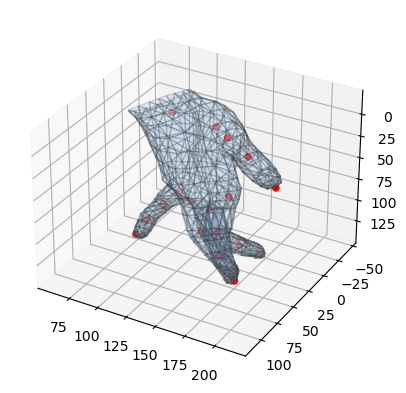

In [11]:
import torch
from manopth.manolayer import ManoLayer
from manopth import demo
batch_size = 10
# Select number of principal components for pose space
ncomps = 45

# Initialize MANO layer
mano_layer = ManoLayer(
    mano_root='/root/workplace/backup/blurhand/model', use_pca=True, ncomps=ncomps, flat_hand_mean=False)

# Generate random shape parameters
random_shape = torch.zeros(batch_size, 10)
# Generate random pose parameters, including 3 values for global axis-angle rotation
random_pose = norm

# Forward pass through MANO layer
hand_verts, hand_joints = mano_layer(random_pose, random_shape)
demo.display_hand({
    'verts': hand_verts,
    'joints': hand_joints
},
                  mano_faces=mano_layer.th_faces)

In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import torch

In [8]:
def cam_equal_aspect_3d(ax, verts, flip_x=False):
    """
    Centers view on cuboid containing hand and flips y and z axis
    and fixes azimuth
    """
    extents = np.stack([verts.min(0), verts.max(0)], axis=1)
    sz = extents[:, 1] - extents[:, 0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize / 2
    if flip_x:
        ax.set_xlim(centers[0] + r, centers[0] - r)
    else:
        ax.set_xlim(centers[0] - r, centers[0] + r)
    # Invert y and z axis
    ax.set_ylim(centers[1] + r, centers[1] - r)
    ax.set_zlim(centers[2] + r, centers[2] - r)

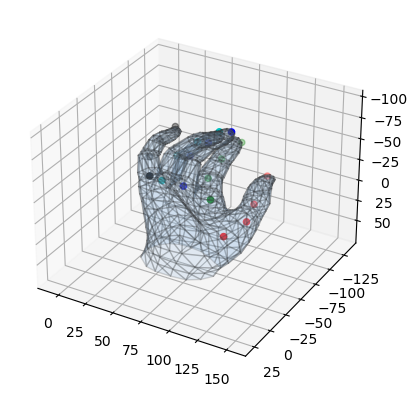

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hand_joints[0, 1:5, 0], hand_joints[0, 1:5, 1], hand_joints[0, 1:5, 2], color='r')
ax.scatter(hand_joints[0, 5:9, 0], hand_joints[0, 5:9, 1], hand_joints[0, 5:9, 2], color='g')
ax.scatter(hand_joints[0, 9:13, 0], hand_joints[0, 9:13, 1], hand_joints[0, 9:13, 2], color='b')
ax.scatter(hand_joints[0, 13:17, 0], hand_joints[0, 13:17, 1], hand_joints[0, 13:17, 2], color='c')
ax.scatter(hand_joints[0, 17:21, 0], hand_joints[0, 17:21, 1], hand_joints[0, 17:21, 2], color='k')
mesh = Poly3DCollection(hand_verts[0][mano_layer.th_faces], alpha=0.2)
face_color = (141 / 255, 184 / 255, 226 / 255)
edge_color = (50 / 255, 50 / 255, 50 / 255)
mesh.set_edgecolor(edge_color)
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)
cam_equal_aspect_3d(ax, hand_verts[0].numpy())
plt.show()

In [49]:
from opendr.camera import ProjectPoints
from opendr.renderer import ColoredRenderer, TexturedRenderer
from opendr.lighting import LambertianPointLight, SphericalHarmonics
import trimesh
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    AmbientLights,
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    SoftSilhouetteShader,
    SoftPhongShader,
    TexturesVertex,
    PerspectiveCameras
)
from pytorch3d.utils import cameras_from_opencv_projection

In [50]:
class Renderer(object):
    """
    Render mesh using OpenDR for visualization.
    """

    def __init__(self, width=600, height=600, near=0.5, far=1000, faces=None):
        self.colors = {'hand': [.9, .9, .9], 'pink': [.9, .7, .7], 'light_blue': [0.65098039, 0.74117647, 0.85882353] }
        self.width = width
        self.height = height
        self.faces = faces
        self.renderer = ColoredRenderer()

    def render(self, vertices, faces=None, img=None,
               camera_t=np.zeros([3], dtype=np.float32),
               camera_rot=np.zeros([3], dtype=np.float32),
               camera_center=None,
               use_bg=False,
               bg_color=(0.0, 0.0, 0.0),
               body_color=None,
               focal_length=5000,
               disp_text=False,
               gt_keyp=None,
               pred_keyp=None,
               **kwargs):
        if img is not None:
            height, width = img.shape[:2]
        else:
            height, width = self.height, self.width

        if faces is None:
            faces = self.faces

        if camera_center is None:
            camera_center = np.array([width * 0.5,
                                      height * 0.5])

        self.renderer.camera = ProjectPoints(rt=camera_rot,
                                             t=camera_t,
                                             f=focal_length * np.ones(2),
                                             c=camera_center,
                                             k=np.zeros(5))
        dist = np.abs(self.renderer.camera.t.r[2] -
                      np.mean(vertices, axis=0)[2])
        far = dist + 20

        self.renderer.frustum = {'near': 1.0, 'far': far,
                                 'width': width,
                                 'height': height}

        if img is not None:
            if use_bg:
                self.renderer.background_image = img
            else:
                self.renderer.background_image = np.ones_like(
                    img) * np.array(bg_color)

        if body_color is None:
            color = self.colors['light_blue']
        else:
            color = self.colors[body_color]

        if isinstance(self.renderer, TexturedRenderer):
            color = [1.,1.,1.]

        self.renderer.set(v=vertices, f=faces,
                          vc=color, bgcolor=np.ones(3))
        albedo = self.renderer.vc
        # Construct Back Light (on back right corner)
        yrot = np.radians(120)

        self.renderer.vc = LambertianPointLight(
            f=self.renderer.f,
            v=self.renderer.v,
            num_verts=self.renderer.v.shape[0],
            light_pos=rotateY(np.array([-200, -100, -100]), yrot),
            vc=albedo,
            light_color=np.array([1, 1, 1]))

        # Construct Left Light
        self.renderer.vc += LambertianPointLight(
            f=self.renderer.f,
            v=self.renderer.v,
            num_verts=self.renderer.v.shape[0],
            light_pos=rotateY(np.array([800, 10, 300]), yrot),
            vc=albedo,
            light_color=np.array([1, 1, 1]))

        #  Construct Right Light
        self.renderer.vc += LambertianPointLight(
            f=self.renderer.f,
            v=self.renderer.v,
            num_verts=self.renderer.v.shape[0],
            light_pos=rotateY(np.array([-500, 500, 1000]), yrot),
            vc=albedo,
            light_color=np.array([.7, .7, .7]))

        return self.renderer.r

def concat_meshes(mesh_list):
    '''manually concat meshes'''
    cur_vert_number = 0
    cur_face_number = 0
    verts_list = []
    faces_list = []
    for idx, m in enumerate(mesh_list):
        verts_list.append(m.vertices)
        faces_list.append(m.faces + cur_vert_number)
        cur_vert_number += len(m.vertices)

    combined_mesh = trimesh.Trimesh(np.concatenate(verts_list),
        np.concatenate(faces_list), process=False
    )
    return combined_mesh

def create_skeleton_mesh(joints):
    mesh_list = []
    # Sphere for joints
    for idx, j in enumerate(joints):
        joint_sphere = trimesh.creation.icosphere(subdivisions=3, radius=0.005)
        joint_sphere.vertices += j.detach().cpu().numpy()
        mesh_list.append(joint_sphere)
    
    parent = np.array([0, 0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19])
    # Cylinder for bones
    for idx in range(1, 21):
        ed = joints[idx].detach().cpu().numpy()
        st = joints[parent[idx]].detach().cpu().numpy()
        skel = trimesh.creation.cylinder(0.003, segment=(st, ed))
        mesh_list.append(skel)

    skeleton_mesh = concat_meshes(mesh_list)
    return skeleton_mesh

def rotateY(points, angle):
    ry = np.array([
        [np.cos(angle), 0., np.sin(angle)], [0., 1., 0.],
        [-np.sin(angle), 0., np.cos(angle)]
    ])
    return np.dot(points, ry)

def render_handjoint(kps, renderer, out_img_path=None):
    hand_joints = torch.from_numpy(kps)
    # hand_joints = kps

    # render HALO
    camera_t = np.array([0., 0.05, 70])
    skeleton_mesh = create_skeleton_mesh(hand_joints)

    final = renderer.render(skeleton_mesh.vertices, skeleton_mesh.faces, camera_t=camera_t)

    return final

In [40]:
def mano2Frei(Mano_joints):#[b,21,3]
    FreiHand_joints = torch.zeros_like(Mano_joints).to(Mano_joints.device) # init empty list

    # manoId, FreiId
    mapping = {0: 0, #Wrist
               1: 5, 2: 6, 3: 7, 17: 8, #Index
               4: 9, 5: 10, 6: 11, 18: 12, #Middle
               7: 17, 8: 18, 9: 19, 20: 20, # Pinky
               10: 13, 11: 14, 12: 15, 19: 16, # Ring
               13: 1, 14: 2, 15: 3, 16: 4,} # Thumb

    for manoId, myId in mapping.items():
        FreiHand_joints[:,myId] = Mano_joints[:,manoId]
    #import pdb; pdb.set_trace()
    return FreiHand_joints

In [41]:
hand_joints = mano2Frei(hand_joints)

In [51]:
joints = hand_joints[0] - hand_joints[0, 9]
joints = joints / torch.norm(joints[10] - joints[9], dim=0)

In [52]:
joints.shape

torch.Size([21, 3])

In [53]:
renderer = Renderer()
JOINT = render_handjoint(joints.numpy(), renderer)

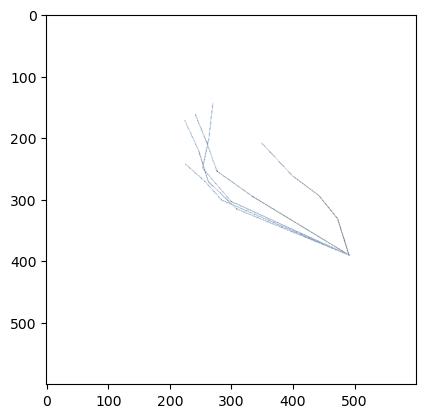

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(JOINT)
plt.show()

In [55]:
path = "/root/workplace/ssd/dataset/freiHand_dataset/training_xyz.json"

In [56]:
import json
import os

In [57]:
def _assert_exist(p):
    msg = 'File does not exists: %s' % p
    assert os.path.exists(p), msg

def json_load(p):
    _assert_exist(p)
    with open(p, 'r') as fi:
        d = json.load(fi)
    return d

In [58]:
j3d_list = json_load(path)

In [59]:
joint = torch.FloatTensor(j3d_list[0])

In [62]:
joint = joint - joint[9]
joint = joint / torch.norm(joint[10] - joint[9])

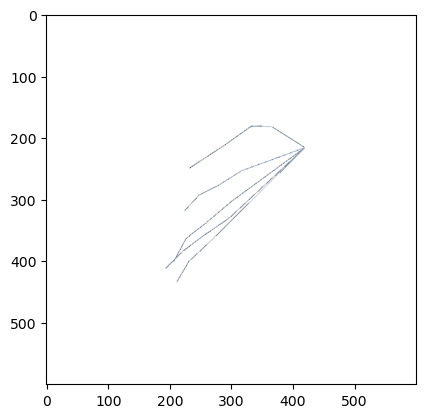

In [64]:
renderer = Renderer()
JOINT = render_handjoint(joint.numpy(), renderer)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(JOINT)
plt.show()

In [72]:
import glob
from PIL import Image

In [69]:
img_path = "/root/workplace/ssd/dataset/freiHand_dataset/training/rgb"
imglist = glob.glob(img_path+"/*")

In [75]:
imglist.sort()

In [76]:
imglist[0]

'/root/workplace/ssd/dataset/freiHand_dataset/training/rgb/00000000.jpg'

In [77]:
a = Image.open(imglist[0]).convert('RGB')

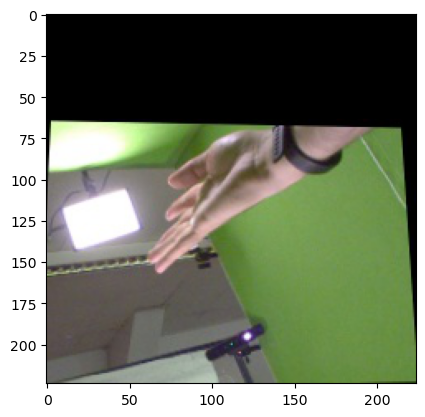

In [78]:
plt.imshow(a)

In [79]:
joint

tensor([[ 1.6179, -1.1867, -2.2157],
        [ 0.8997, -1.6670, -1.4132],
        [ 0.4495, -1.6969, -0.6418],
        [-0.1245, -1.2942, -0.2149],
        [-0.9440, -0.7677,  0.3321],
        [ 0.2294, -0.6985,  0.2019],
        [-0.3037, -0.3677,  1.0256],
        [-0.7511, -0.1438,  1.5341],
        [-1.1015,  0.2238,  2.1790],
        [ 0.0000,  0.0000,  0.0000],
        [-0.5739,  0.4862,  0.6590],
        [-1.0399,  0.8498,  1.1024],
        [-1.3392,  1.3946,  1.6737],
        [-0.0505,  0.3739, -0.7262],
        [-0.5880,  0.7432, -0.0681],
        [-1.0928,  1.1253,  0.3939],
        [-1.5140,  1.5407,  0.9860],
        [-0.1265,  0.5505, -1.3510],
        [-0.5606,  0.9776, -1.0452],
        [-0.9542,  1.3456, -0.7658],
        [-1.2249,  1.8043, -0.3701]])

In [92]:
mano = "/root/workplace/ssd/dataset/freiHand_dataset/training_mano.json"
mano = json_load(mano)

In [93]:
mano_param = mano[0][0]

In [94]:
pose_param = mano_param[:48]
shape_param = mano_param[48:58]
uv_root_param = mano_param[58:60]
scale_param = mano_param[60:]
bs = 1

beta = torch.Tensor(shape_param).repeat(bs,1)
pose = torch.Tensor(pose_param[3:]).repeat(bs,1)
rvec = torch.Tensor([np.pi/2,np.pi/2,np.pi/2]).repeat(bs,1)
tvec = torch.Tensor(mano_param[58:61]).repeat(bs,1)

In [95]:
batch_size = 1
# Select number of principal components for pose space
ncomps = 23

# Initialize MANO layer
mano_layer = ManoLayer(
    mano_root='/root/workplace/backup/blurhand/model', use_pca=True, ncomps=ncomps, flat_hand_mean=False)

# Generate random shape parameters
random_shape = beta
# Generate random pose parameters, including 3 values for global axis-angle rotation
random_pose = torch.concat([pose, rvec], dim=1)

# Forward pass through MANO layer
hand_verts, hand_joints = mano_layer(random_pose, random_shape)

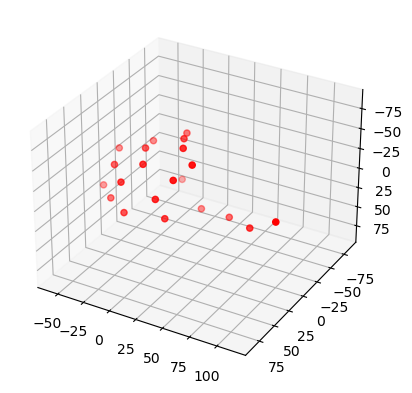

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hand_joints[0, :, 0], hand_joints[0, :, 1], hand_joints[0, :, 2], color='r')
cam_equal_aspect_3d(ax, hand_verts[0].numpy())
plt.show()

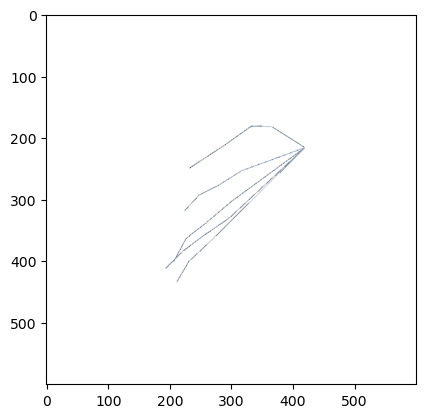

In [98]:
joints = hand_joints[0] - hand_joints[0, 9]
joints = joints / torch.norm(joints[10] - joints[9], dim=0)
renderer = Renderer()
JOINT = render_handjoint(joint.numpy(), renderer)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(JOINT)
plt.show()